In [1]:
from settings import *

random_rho0s: setting seed=93440


In [2]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

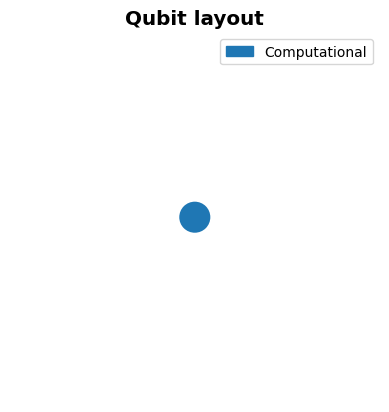

In [3]:
qubits.show_layout()

In [4]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, n_grad=10, max_count=100)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=55726
Iteration: 0 
            Max gradient term: 0.05240083753799141 
            Current gradient: [0.         0.         0.         0.         0.         0.
 0.05132163 0.         0.         0.         0.         0.
 0.         0.         0.05240084 0.         0.05240084 0.01741941
 0.         0.         0.         0.         0.         0.
 0.         0.01727252 0.         0.         0.         0.
 0.         0.         0.         0.         0.05141688 0.
 0.         0.         0.0523586  0.        ] 
            Current error: 0.26555201897708386 
            Current sigma values: (0, 1, 10)


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 10 
            Max gradient term: 0.0 
            Current gradient: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00014831 -0.00013666  0.
  0.         -0.0011804   0.          0.          0.         -0.00056704
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ] 
            Current error: 8.346128441039957e-06 
            Current sigma values: (0, 2, 5.0)
Iteration: 20 
            Max gradient term: 1.6925392839085654e-06 
            Current gradient: [ 0.00000000e+00 -7.88387318e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.69253928e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.01302541e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+

In [5]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [6]:
theta_opt

array([0.95755074, 0.90370778, 1.00348045, 1.        , 1.02322782,
       0.99791611, 0.49173508, 1.        , 1.05438854, 0.98024278,
       1.02246672, 1.        , 0.98946208, 1.01725244, 0.41728455,
       1.        , 0.44423718, 0.84493482, 1.01533479, 1.        ,
       0.84551154, 1.02514893, 1.00907623, 1.        , 0.92428911,
       0.73555643, 0.8999349 , 1.        , 1.00585965, 0.99746994,
       1.08093736, 1.        , 0.99518558, 1.01297047, 0.45386994,
       1.        , 0.93438663, 0.92723868, 0.47642433, 1.        ])

In [7]:
from q_channel_approx.unitary_circuits import unitary_circuit_fac

In [8]:
ham = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)(theta_opt)
ham

array([[-9.99995849e-01+4.67702909e-05j, -3.27029477e-05+2.88080546e-03j],
       [ 3.27029477e-05+2.88080546e-03j, -9.99995849e-01-4.67702909e-05j]])

In [9]:
from q_channel_approx.physics_defns import create_hamiltonian
create_hamiltonian(system)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.  0.4]
 [0.4 0. ]]

rho_rand_haar: seed=32759


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

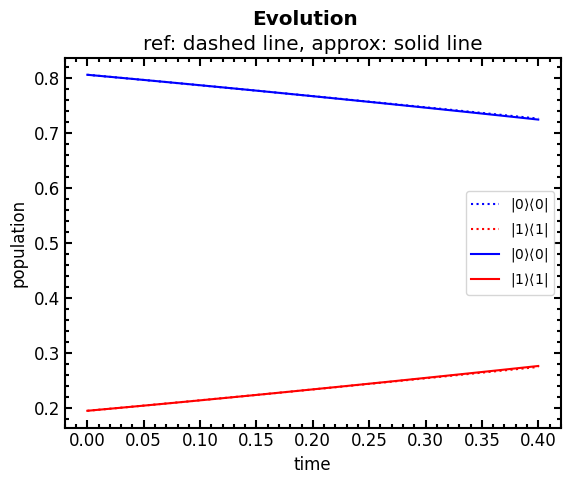

In [10]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.01, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

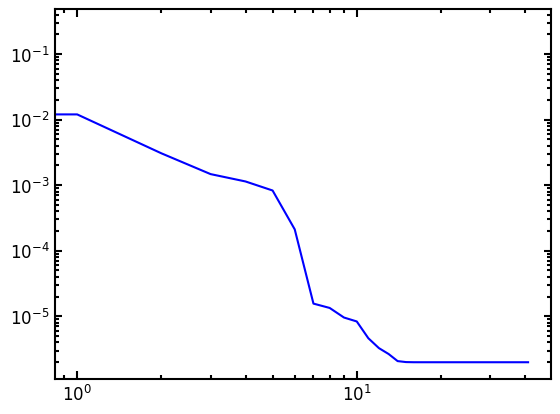

In [11]:
plt.loglog(errors)